Here are a few use cases for this project:

Compliance Monitoring: The Construction Site Safety model can be used by construction site managers, safety officers, or regulatory agencies to monitor and ensure that workers are adhering to safety protocols, such as wearing appropriate personal protective equipment (PPE).

Accident Detection and Prevention: The model can be integrated with surveillance or monitoring systems on construction sites to detect potentially hazardous situations, such as a person not wearing a hardhat or safety vest near heavy machinery, allowing for real-time intervention and accident prevention.

Construction Site Access Control: The model can be employed at entry and exit points of construction sites to identify and grant access only to authorized personnel wearing the proper safety gear, helping to maintain a safe working environment and prevent unauthorized access.

Equipment and Vehicle Tracking: The Construction Site Safety model can be used to automatically track the movement and usage of construction vehicles and machinery within the construction site, enabling better project management, fleet optimization, and maintenance scheduling.

Job Site Documentation and Reporting: The model can be employed in generating documentation and reports on the compliance, safety measures, and progress of construction projects. It can automatically label photos taken of the construction site, providing valuable metadata for site inspections, progress tracking, and safety audits.

In [17]:
!pip install roboflow

from roboflow import Roboflow   # Downlode Data Set From roboflow
rf = Roboflow(api_key="mztMH4jfnVFlxWjJJxWk")
project = rf.workspace("roboflow-universe-projects").project("construction-site-safety")
dataset = project.version(30).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.207, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Construction-Site-Safety-30 in yolov8:: 100%|██████████| 1446/1446 [00:00<00:00, 1708.25it/s]


In [ ]:
len(["Excavator", "Gloves", "Hardhat","Ladder","Mask","NO-Hardhat","NO-Mask","NO-Safety Vest","Person","SUV","Safety Cone","Safety Vest","bus","dump truck","fire hydrant","machinery","mini-van","sedan","semi","trailer","truck","van","vehicle","wheel loader"])

24

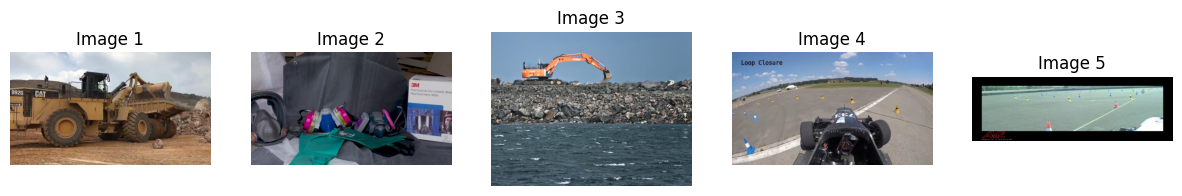

In [18]:
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

# Directory where your training images are located
data_dir = '/content/Construction-Site-Safety-30/train/images'

# List all files in the directory
image_files = os.listdir(data_dir)

# Select 5 random images
random_images = random.sample(image_files, 5)

# Set up a 2x3 grid for displaying the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Loop through and display the selected images
for i, image_file in enumerate(random_images):
    image_path = os.path.join(data_dir, image_file)
    image = imread(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f'Image {i+1}')
    axes[i].axis('off')

plt.show()

In [19]:
# now install ultralytics
!pip install ultralytics

In [20]:
# read data.yaml file
%cat /content/Construction-Site-Safety-30/data.yaml

names:
- Excavator
- Gloves
- Hardhat
- Ladder
- Mask
- NO-Hardhat
- NO-Mask
- NO-Safety Vest
- Person
- SUV
- Safety Cone
- Safety Vest
- bus
- dump truck
- fire hydrant
- machinery
- mini-van
- sedan
- semi
- trailer
- truck and trailer
- truck
- van
- vehicle
- wheel loader
nc: 25
roboflow:
  license: CC BY 4.0
  project: construction-site-safety
  url: https://universe.roboflow.com/roboflow-universe-projects/construction-site-safety/dataset/30
  version: 30
  workspace: roboflow-universe-projects
test: ../test/images
train: Construction-Site-Safety-30/train/images
val: Construction-Site-Safety-30/valid/images


In [21]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.4/78.2 GB disk)


In [22]:
from ultralytics import YOLO
from IPython.display import display,Image

In [33]:
# Now Train The YOLOv8 model on your custom data
!yolo task=detect mode=train model=yolov8m.pt data=/content/Construction-Site-Safety-30/data.yaml epochs=130 imgsz=416 plots=True

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Construction-Site-Safety-30/data.yaml, epochs=130, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

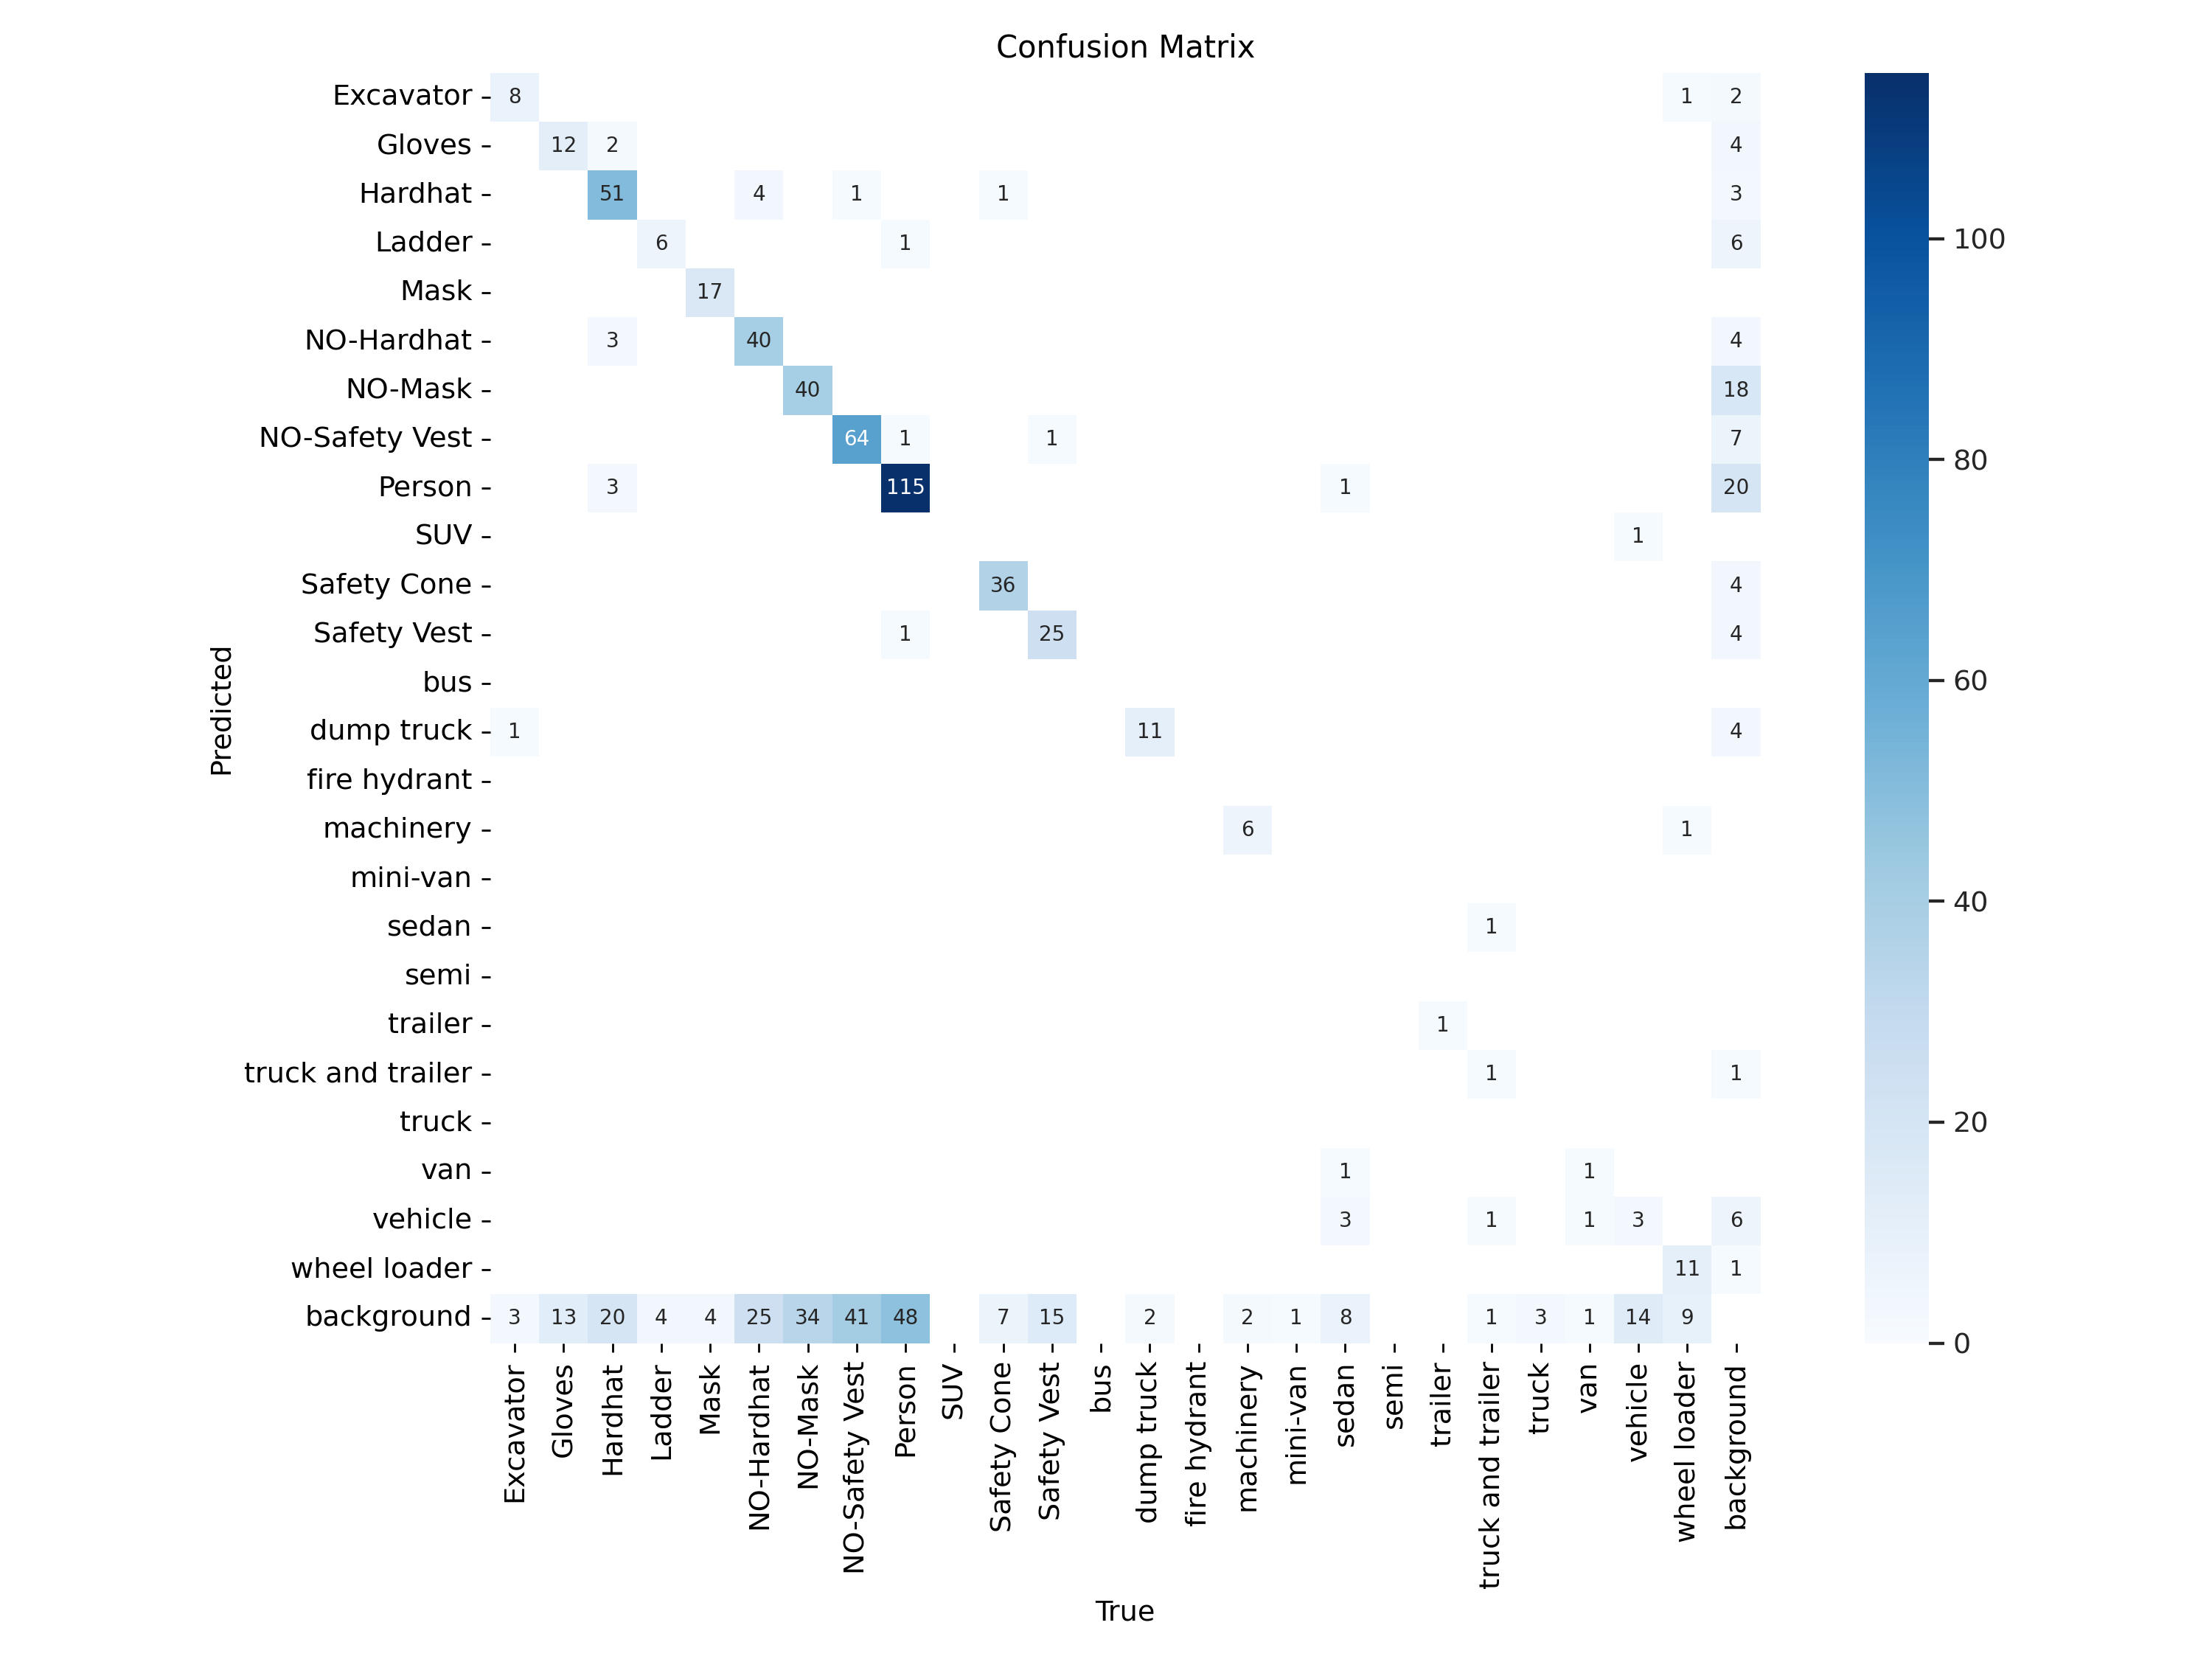

In [34]:
Image(filename="/content/runs/detect/train12/confusion_matrix.png",width=600)

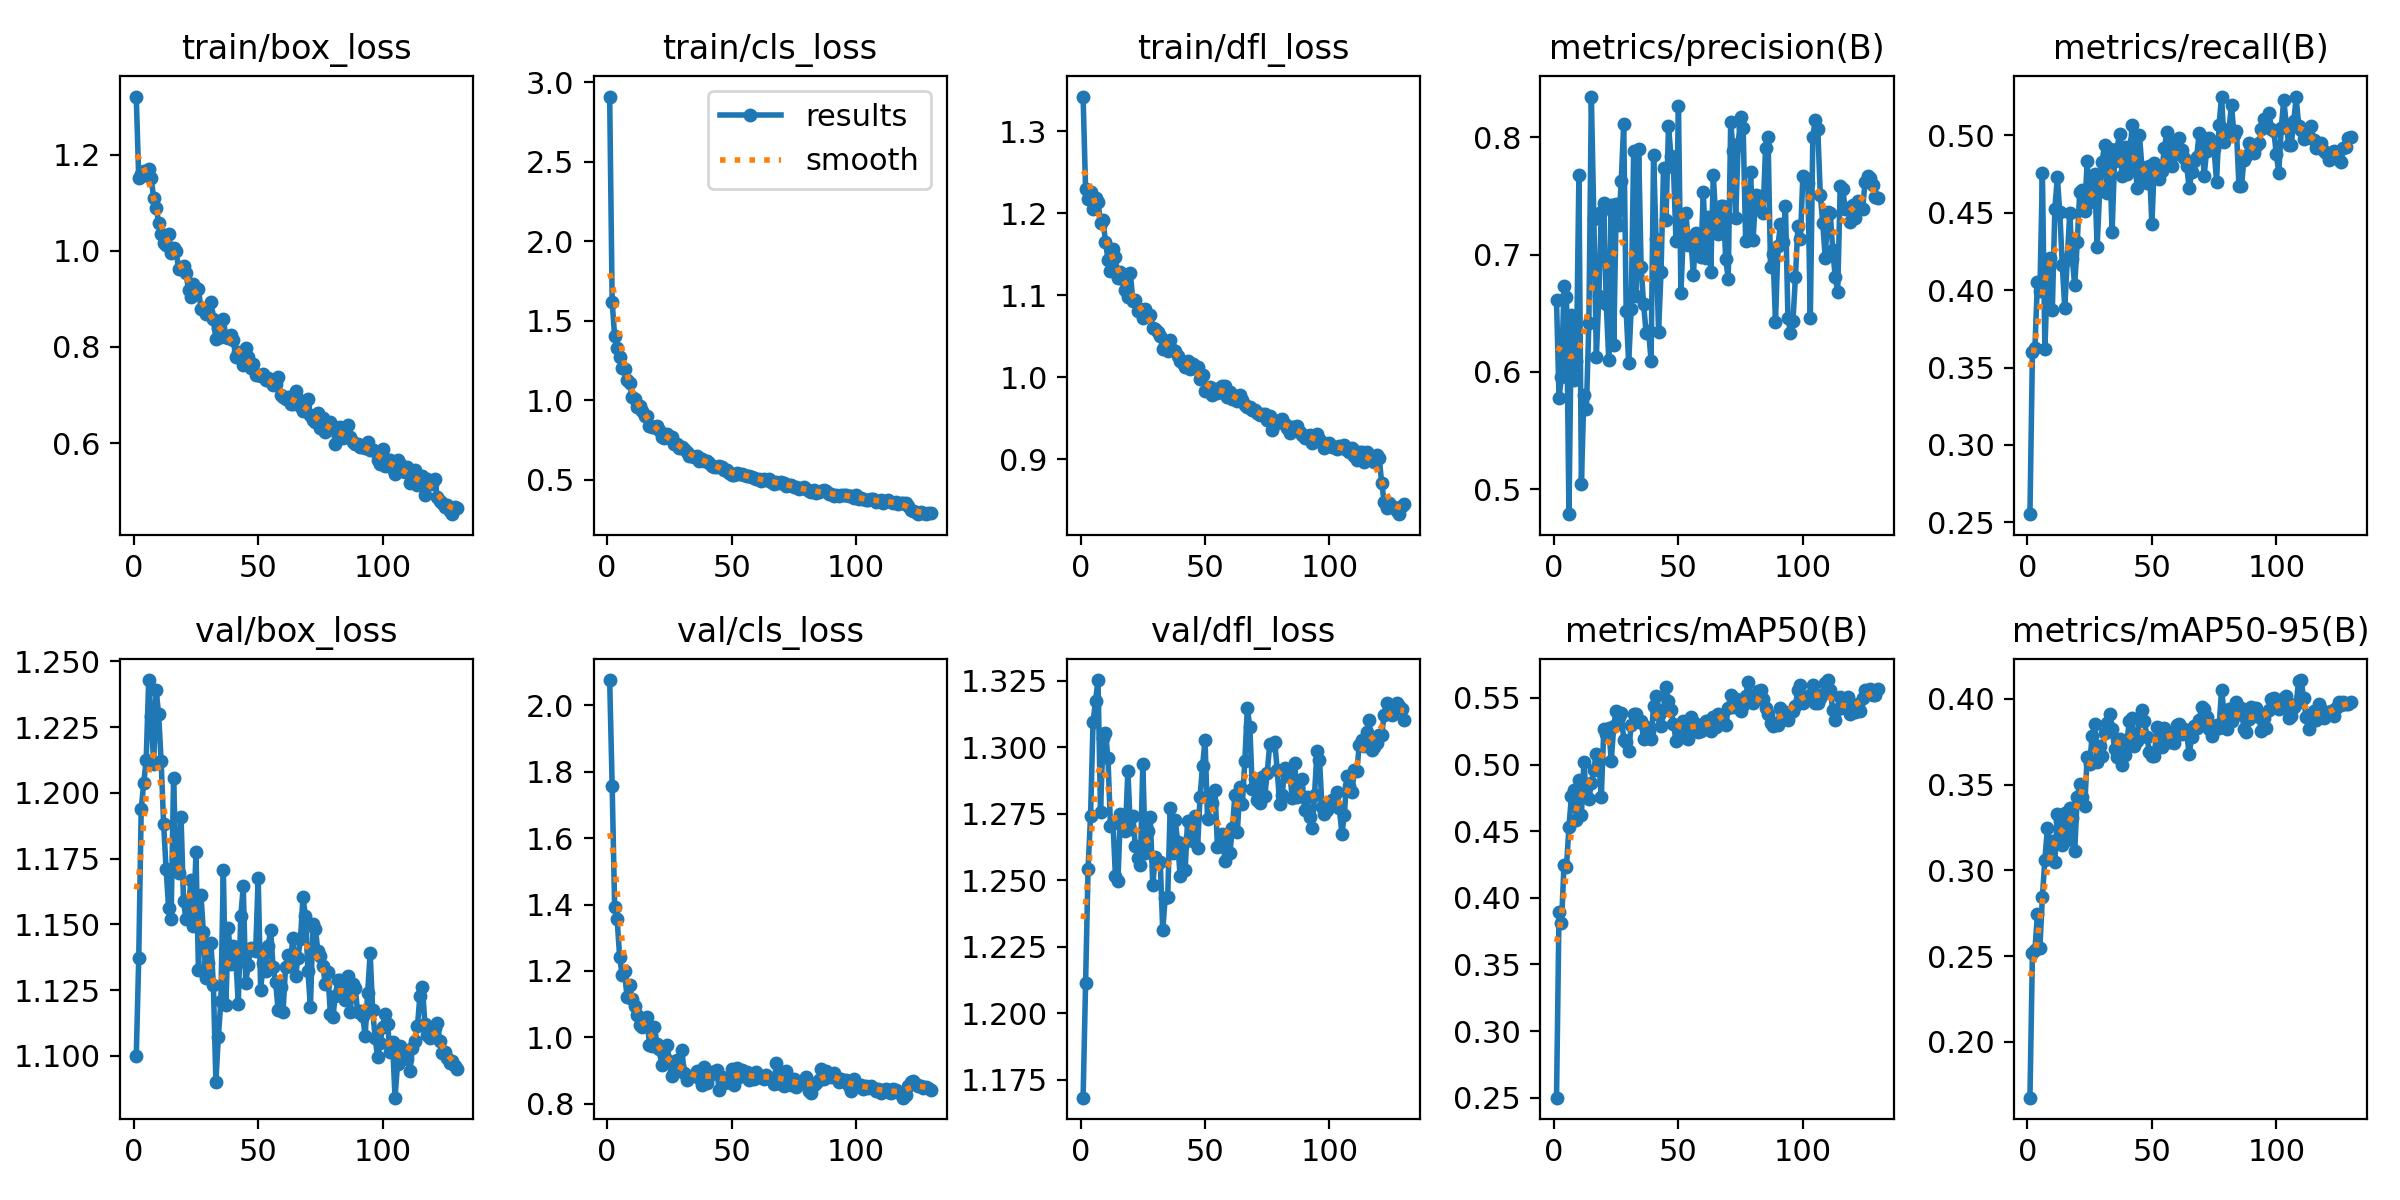

In [35]:
Image(filename="/content/runs/detect/train12/results.png",width=600)

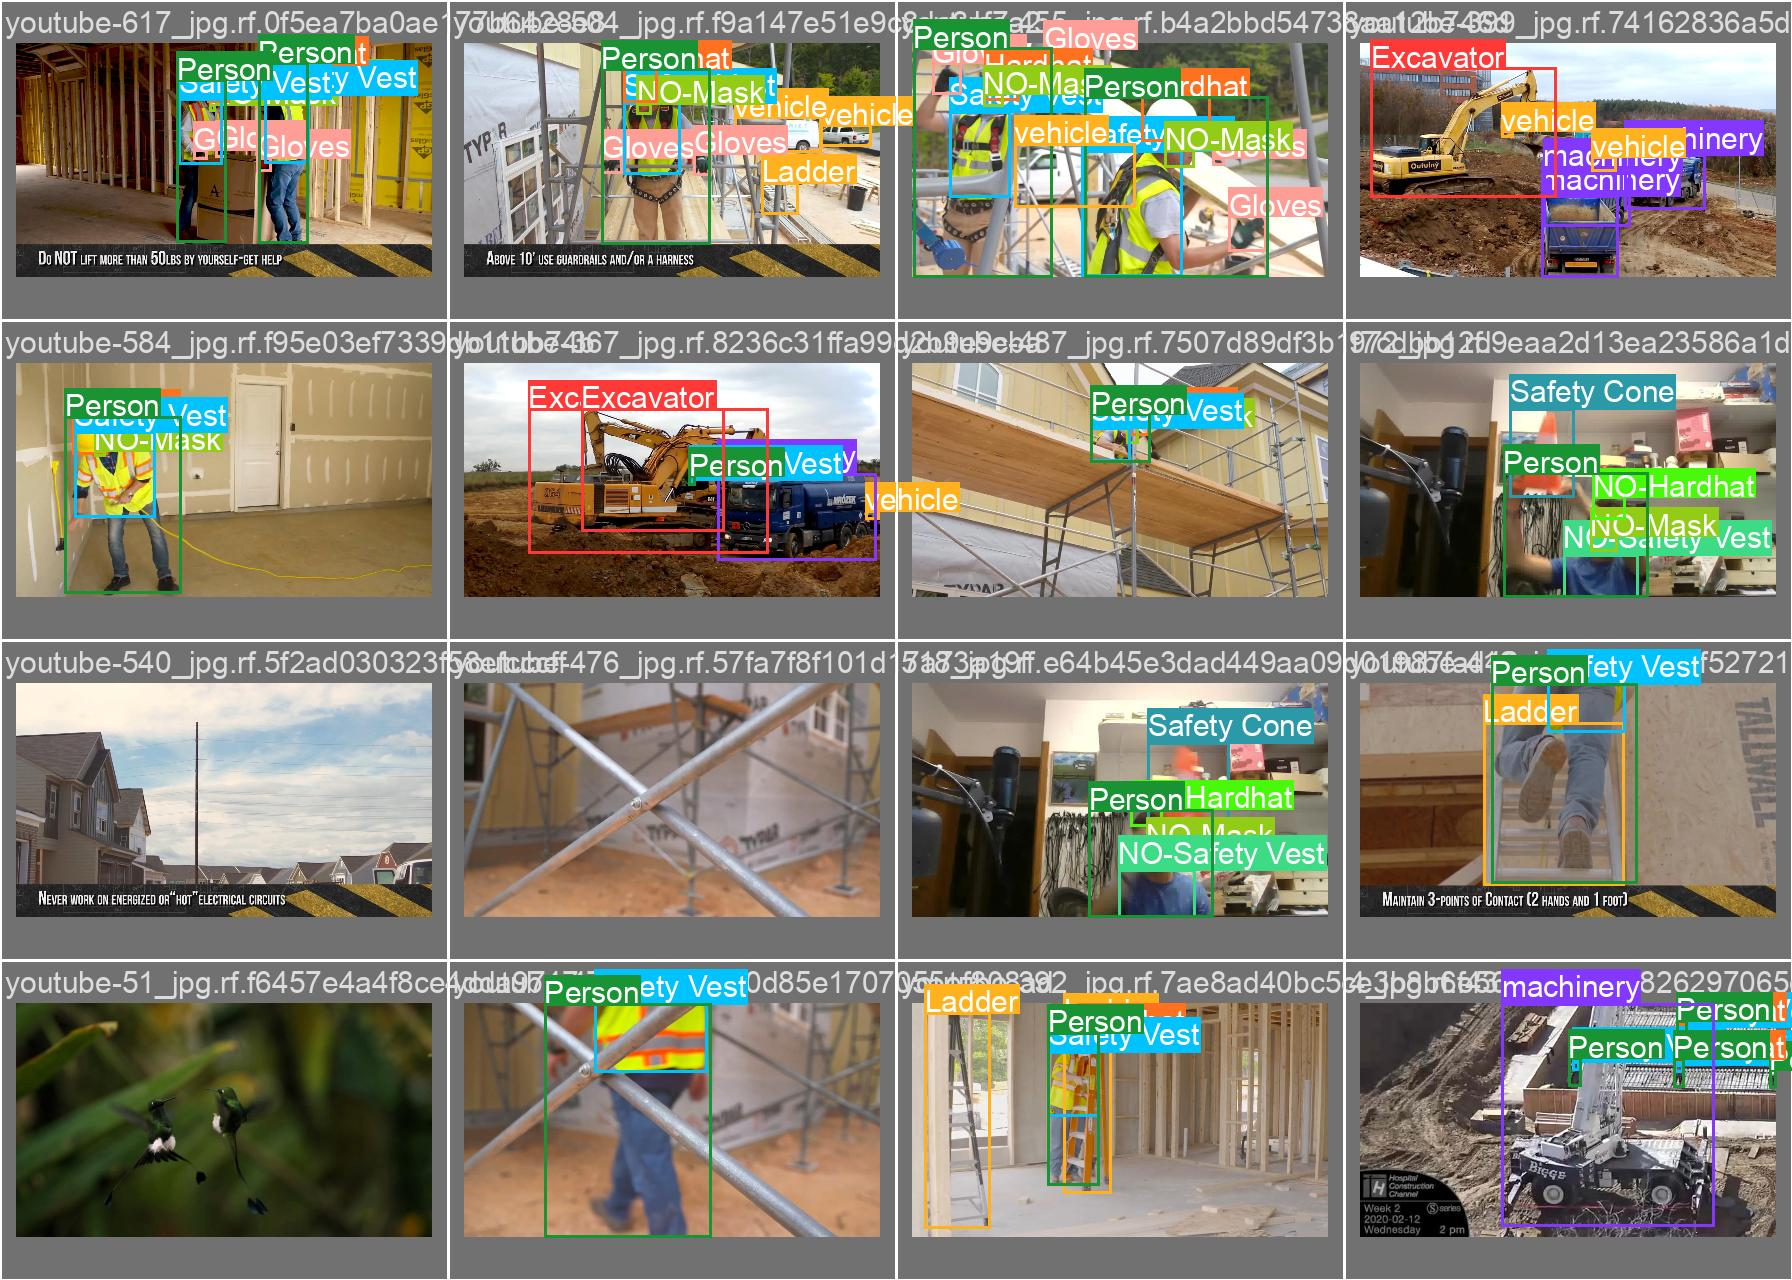

In [37]:
#prediction batchs of yolov8
Image(filename="/content/runs/detect/train12/val_batch1_labels.jpg",width=600)

In [39]:
# now validate model
!yolo task=detect mode=val model=/content/runs/detect/train12/weights/best.pt data= /content/Construction-Site-Safety-30/data.yaml

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25854235 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/Construction-Site-Safety-30/valid/labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:06<00:00,  1.20it/s]
                   all        114        733      0.738      0.503      0.564      0.411
             Excavator        114         12      0.756      0.667      0.799      0.745
                Gloves        114         25      0.763       0.44      0.453       0.25
               Hardhat        114         79       0.86      0.622      0.741      0.563
                Ladder        114         10      0.531        0.7      0.603      0.433
                  Mask        114         21      0.943      0.795      0.849      0.641
            NO-Hardhat        1

In [41]:
# Inference on the test data and predict
!yolo task=detect mode=predict model=/content/runs/detect/train12/weights/best.pt data= /content/Construction-Site-Safety-30/data.yaml conf=0.50 source=/content/Construction-Site-Safety-30/test/images

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25854235 parameters, 0 gradients, 78.8 GFLOPs

image 1/82 /content/Construction-Site-Safety-30/test/images/-4405-_png_jpg.rf.937688313347dbcd3b24201dd7882906.jpg: 416x416 (no detections), 28.8ms
image 2/82 /content/Construction-Site-Safety-30/test/images/000005_jpg.rf.c613c066b79795d219855aca269760e6.jpg: 288x416 1 Hardhat, 1 NO-Mask, 1 Person, 201.0ms
image 3/82 /content/Construction-Site-Safety-30/test/images/002551_jpg.rf.b09484b130c1587abfa8365c3d774bf1.jpg: 288x416 2 Hardhats, 1 NO-Mask, 1 NO-Safety Vest, 2 Persons, 17.3ms
image 4/82 /content/Construction-Site-Safety-30/test/images/003357_jpg.rf.9fb1f2cebc239b4276a81ce2cbf9e911.jpg: 320x416 1 Safety Cone, 113.2ms
image 5/82 /content/Construction-Site-Safety-30/test/images/004063_jpg.rf.6ecc587c20a87ec176841aea39b8f5db.jpg: 288x416 4 Hardhats, 1 NO-Hardhat, 4 NO-Safety Vests, 7 Persons, 1 Safety Vest, 19.5ms
im

In [50]:
!yolo task=detect mode=predict model=/content/runs/detect/train12/weights/best.pt data= /content/Construction-Site-Safety-30/data.yaml conf=0.50 source=/content/images2579-5d68912be288e.jpg

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25854235 parameters, 0 gradients, 78.8 GFLOPs

image 1/1 /content/images2579-5d68912be288e.jpg: 288x416 1 Hardhat, 1 Person, 1 Safety Vest, 137.5ms
Speed: 3.2ms preprocess, 137.5ms inference, 97.6ms postprocess per image at shape (1, 3, 288, 416)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


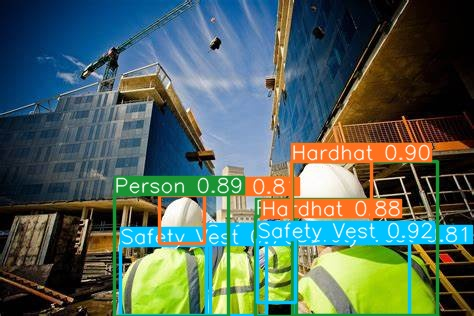

In [43]:
#prediction batchs of yolov8
Image(filename="/content/runs/detect/predict2/OIP.jpeg",width=600)

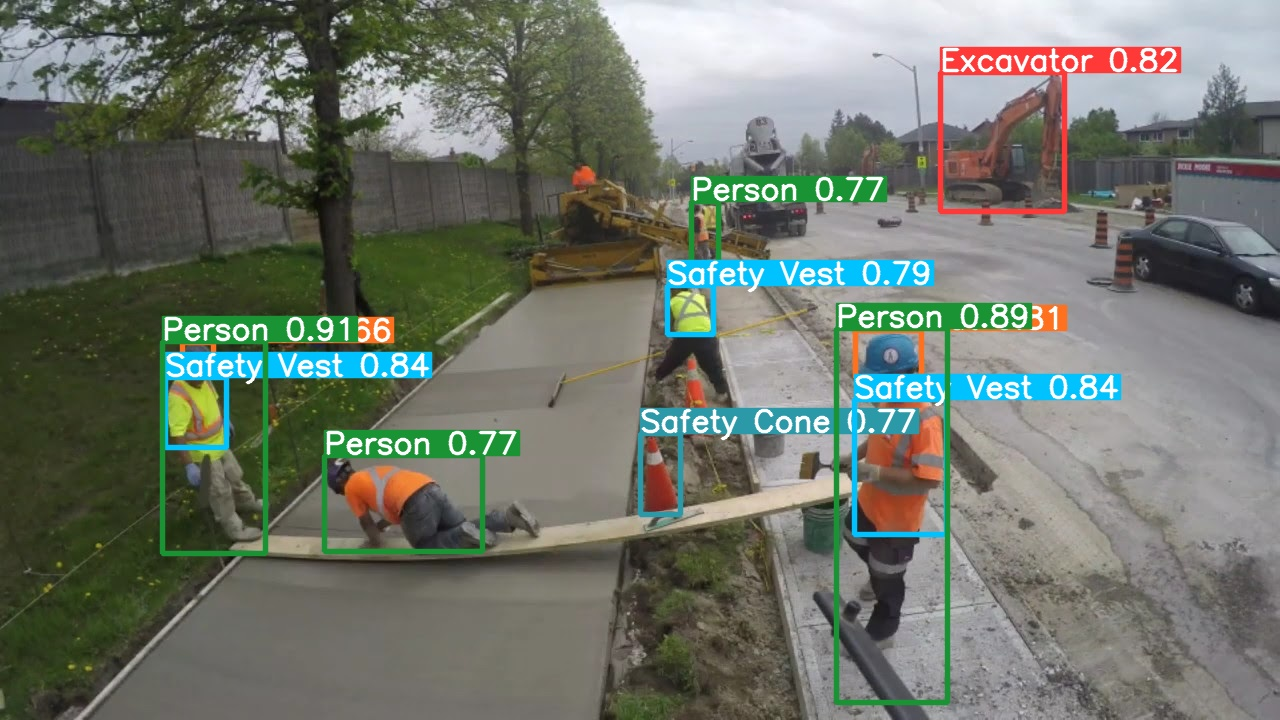

In [45]:
#prediction batchs of yolov8
Image(filename="/content/runs/detect/predict3/maxres2.jpg",width=600)

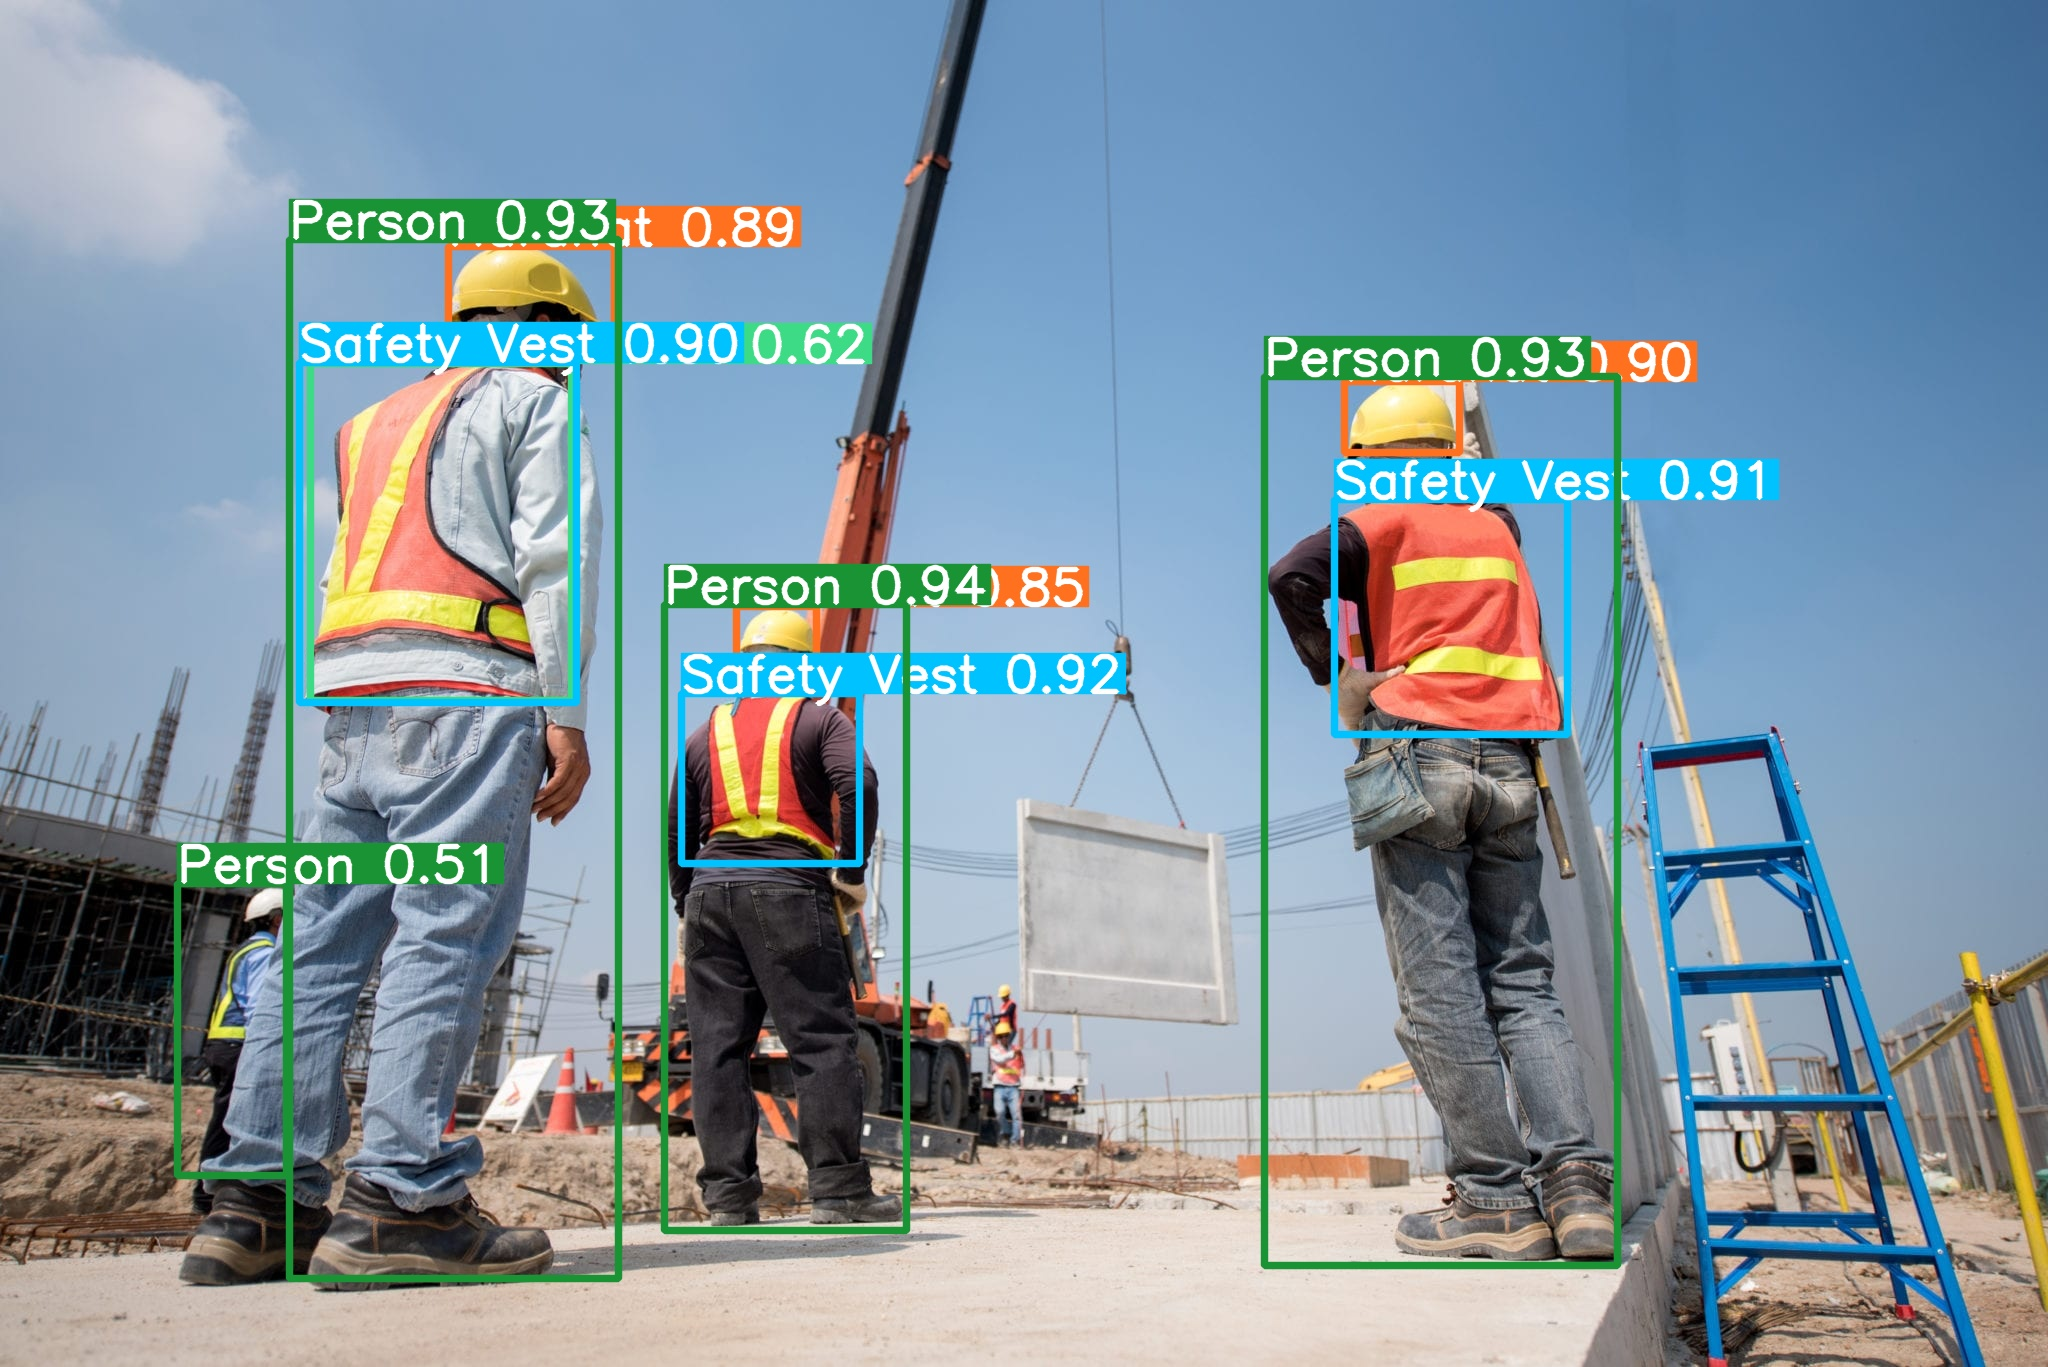

In [47]:
#prediction batchs of yolov8
Image(filename="/content/runs/detect/predict4/shutterstock_790373419.jpg",width=600)

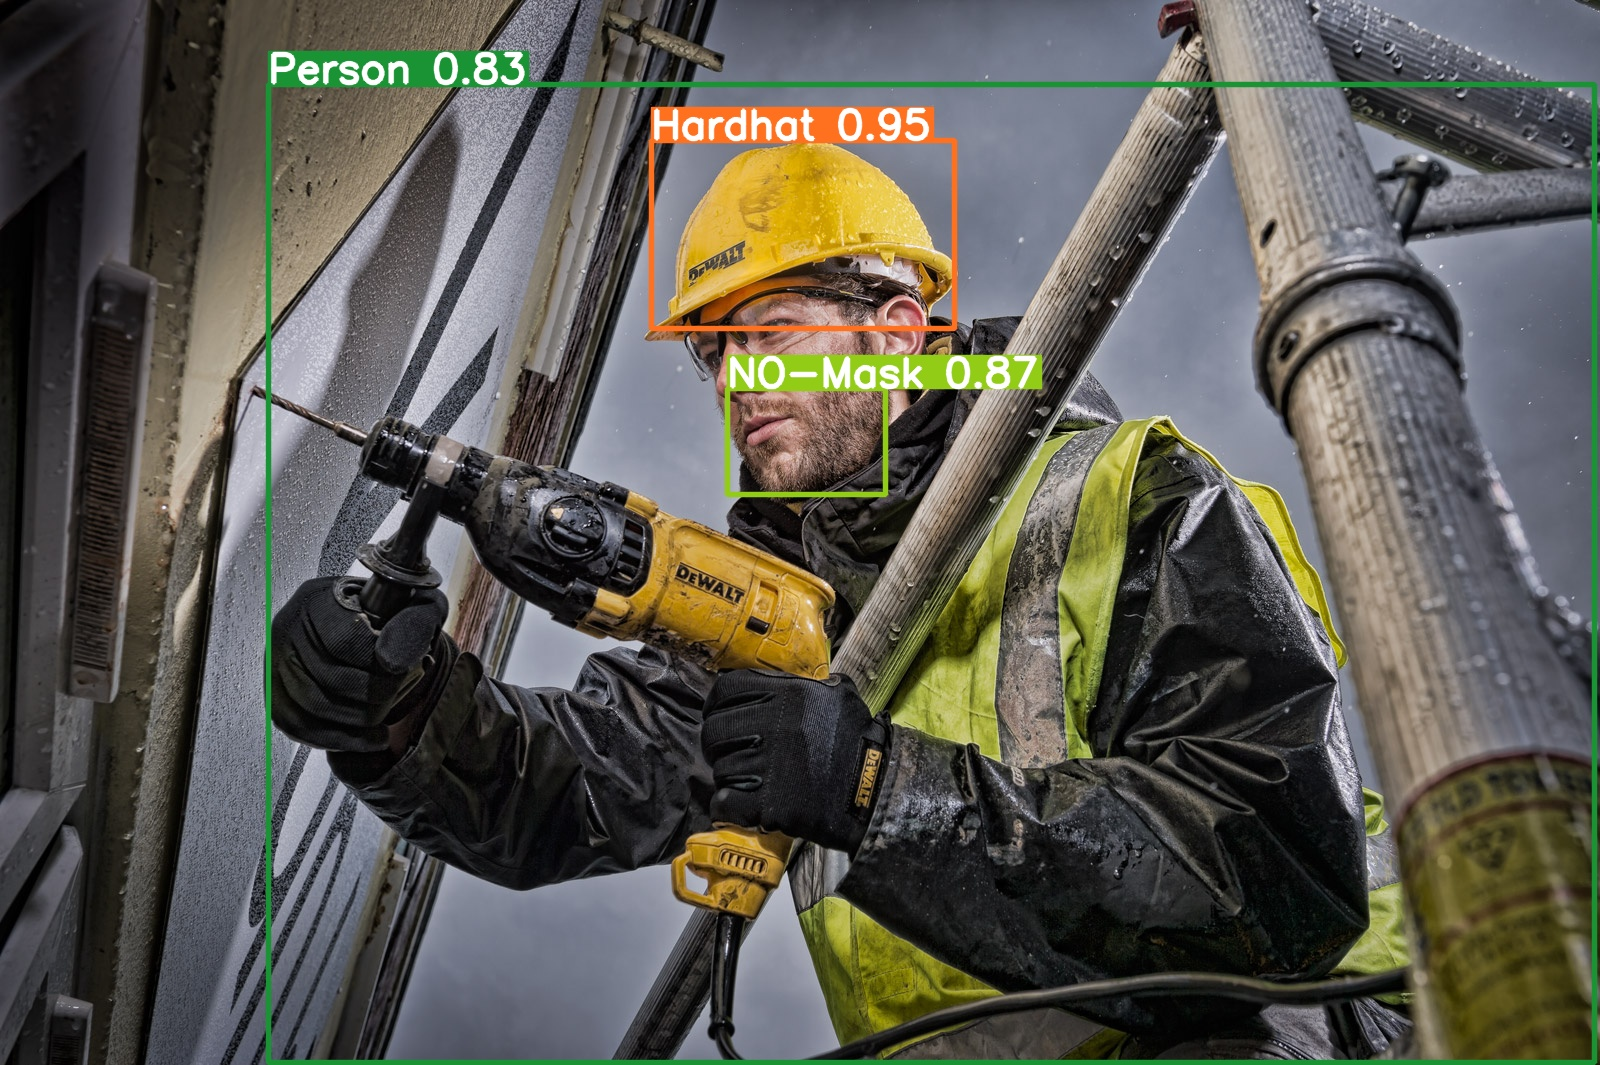

In [49]:
#prediction batchs of yolov8
Image(filename="/content/runs/detect/predict5/Dewalt-photography.jpg",width=600)

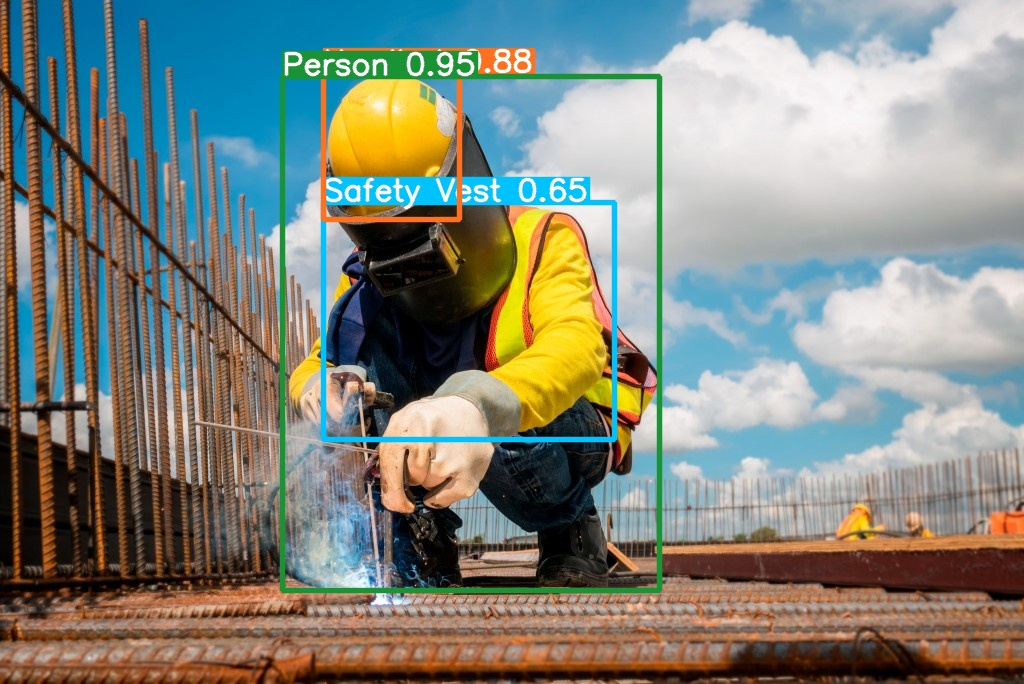

In [51]:
#prediction batchs of yolov8
Image(filename="/content/runs/detect/predict6/images2579-5d68912be288e.jpg",width=600)